Titanic case study for ML

## Titanic ML Challenge Logistic Regression

Analysing the Titanic train and test data set, **The Titanic challenge** on Kaggle is a competition in which the task is to predict the survival or the death of a given passenger based on a set of variables describing him such as his age, his sex, or his passenger class on the boat. 

In [1]:
# import the csv file of titanic by giving the file path using pandas library 

# for this excersize we need the few librarys which are need to import for this case study

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

In [2]:
# Import the data set and lets start the journey

train_df = pd.read_csv("C:\\Users\\Ravi Nadageri\\Downloads\\titanic\\train.csv")

#"C:\Users\Ravi Nadageri\Downloads\titanic\train.csv" file path

In [3]:
#check the how the data set look like
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# using .info () we can grab the many more information about the data set 

train_df.info()

# Now we can see the Age column has the less count compare to the others column so there might be some missing value or NAN or NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# number of rows and columns
train_df.shape

(891, 12)

In [6]:
# This will help us to grab the column names in data set 

train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# number of null values in dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age column has 177 NAN so we can fill it but the Cabin column is missing lot of data so later on we can frop this column

In [8]:
#using hte value counts we can see the count of uniqe iteams
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

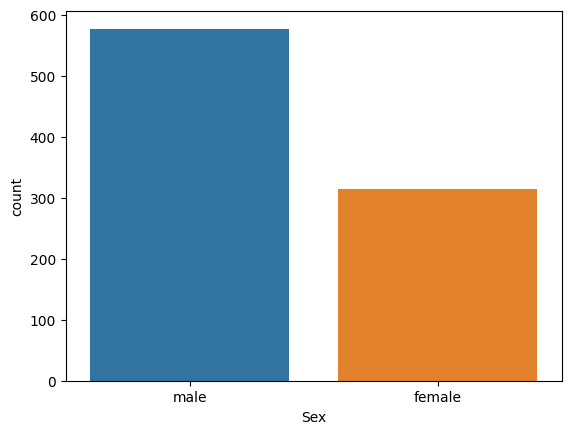

In [11]:
# countplot
sns.countplot(x='Sex', data=train_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

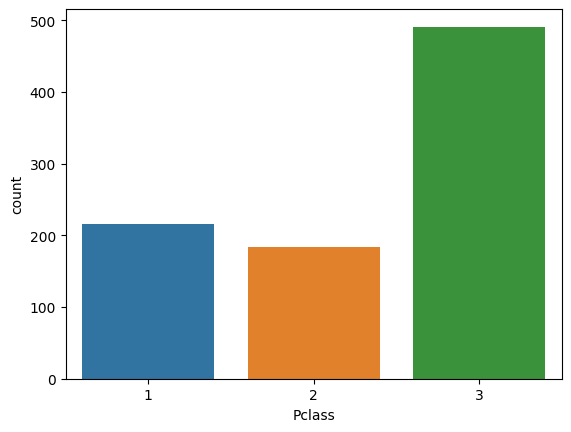

In [12]:
#train_df['Pclass'].value_counts()

sns.countplot(x='Pclass',data=train_df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

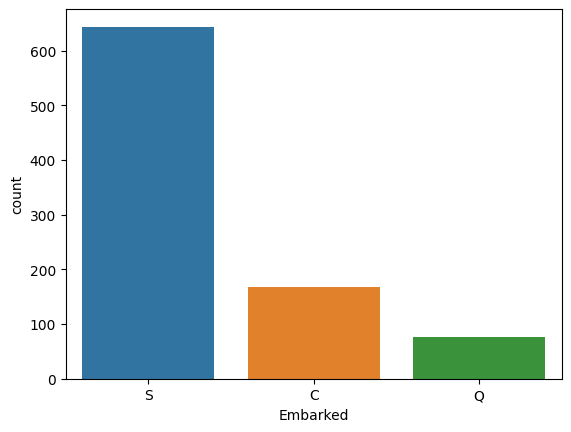

In [13]:
train_df['Embarked'].value_counts()

sns.countplot(x='Embarked',data=train_df)

In [14]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [15]:
# new feature
train_df['Died'] = 1 - train_df['Survived']

<AxesSubplot:xlabel='Sex'>

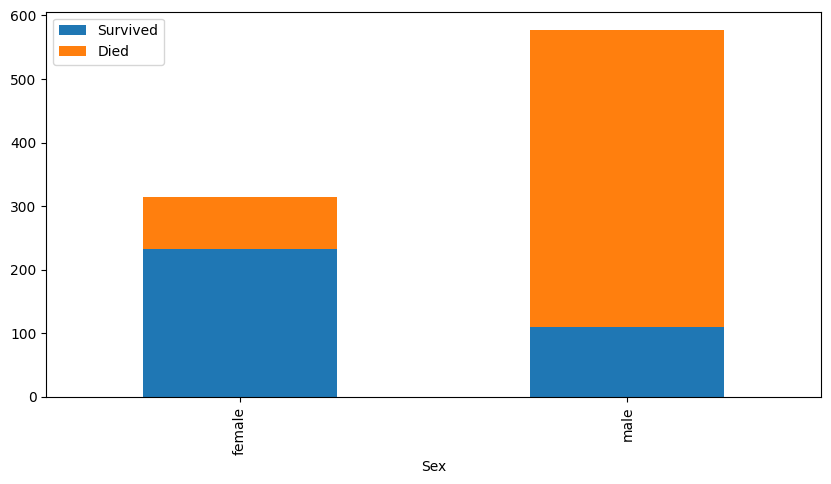

In [16]:
train_df.groupby('Sex').sum()[['Survived','Died']].plot(kind = 'bar',figsize=(10,5),stacked = True)

<AxesSubplot:xlabel='Sex'>

<Figure size 1000x500 with 0 Axes>

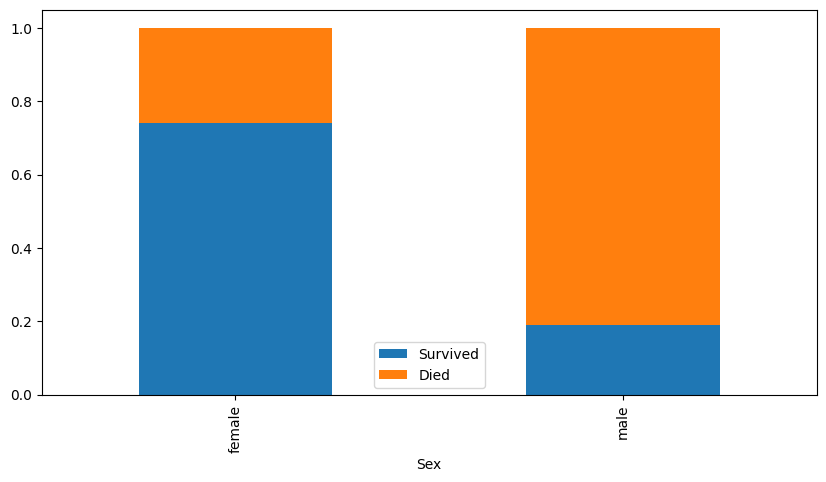

In [18]:
#plt.figure(figsize=(10,5))
train_df.groupby('Sex').mean()[['Survived','Died']].plot(kind='bar',stacked= True,figsize=(10,5))

In [22]:
print(train_df['Survived'].isnull().sum() / len(train_df))

0.0


In [23]:
print(train_df.Survived.sum())

print('-'*20)
len(train_df)

342
--------------------


891

<AxesSubplot:>

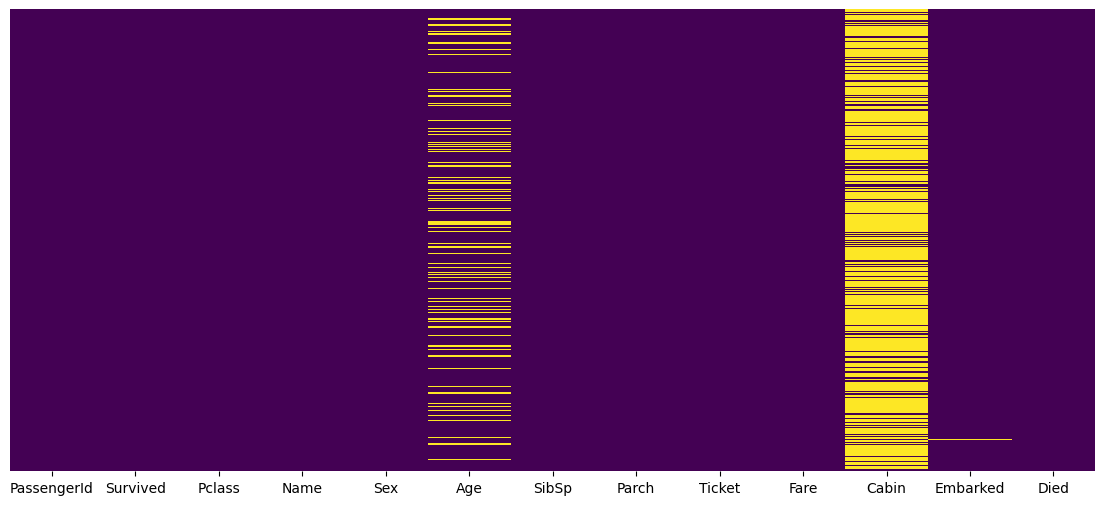

In [25]:
plt.figure(figsize=(14,6))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


So we already know there are missing values on Column 'Age' and 'Cabin'

Let's Plot some Seaborn Plots

<AxesSubplot:xlabel='Survived', ylabel='count'>

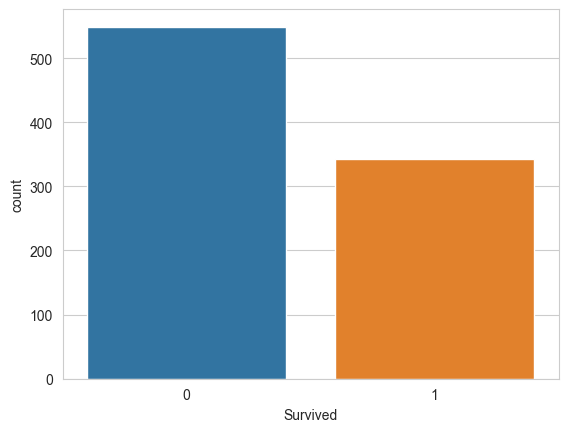

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

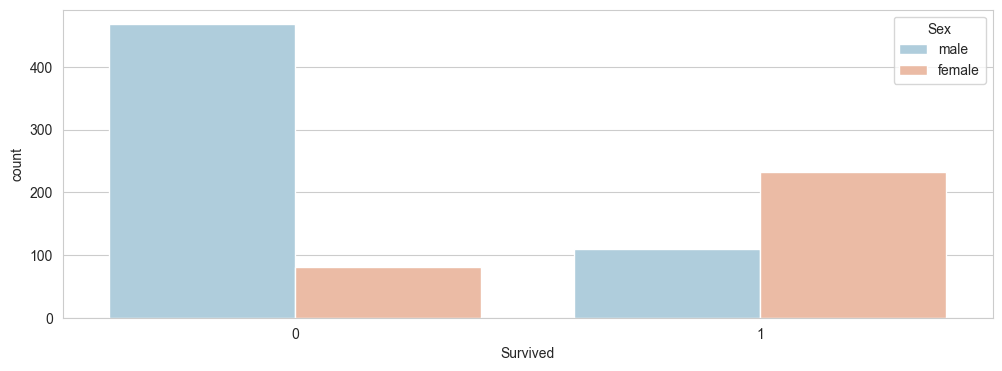

In [29]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex', data=train_df, palette='RdBu_r',)

<AxesSubplot:xlabel='Survived', ylabel='count'>

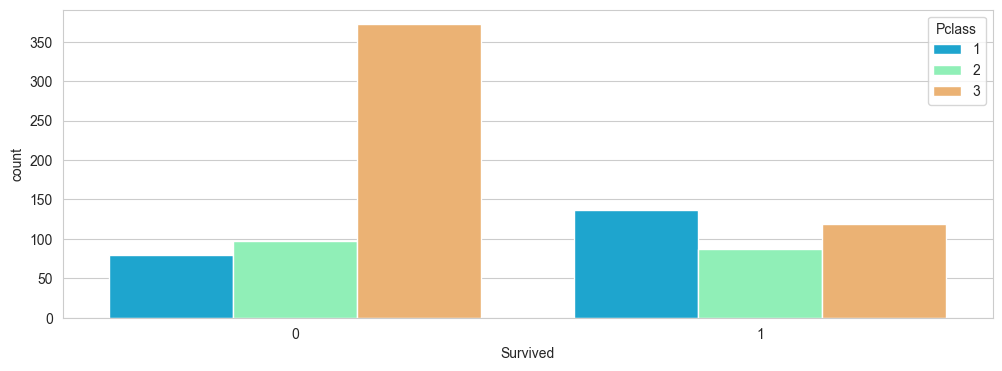

In [30]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass', data=train_df, palette='rainbow')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

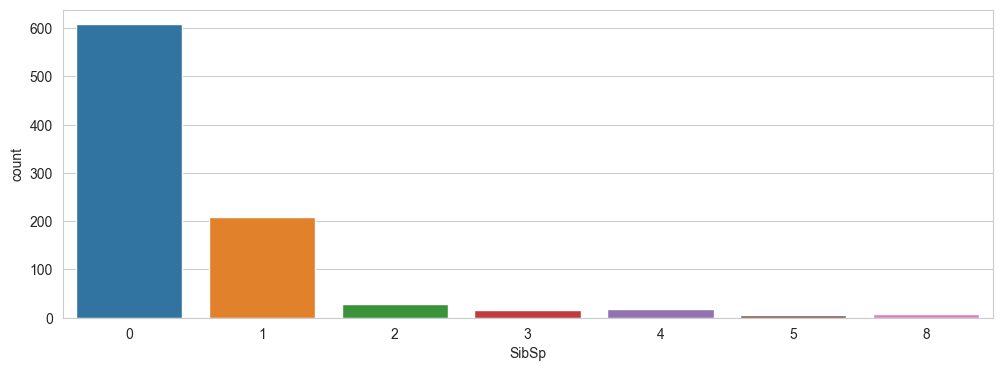

In [39]:
plt.figure(figsize=(12,4))
sns.countplot(x='SibSp', data=train_df)

<AxesSubplot:>

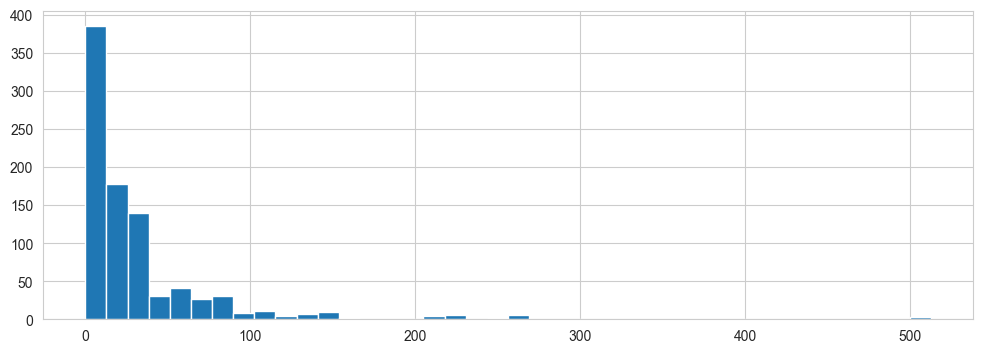

In [38]:
plt.figure(figsize=(12,4))
train_df['Fare'].hist(bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

<Figure size 1200x400 with 0 Axes>

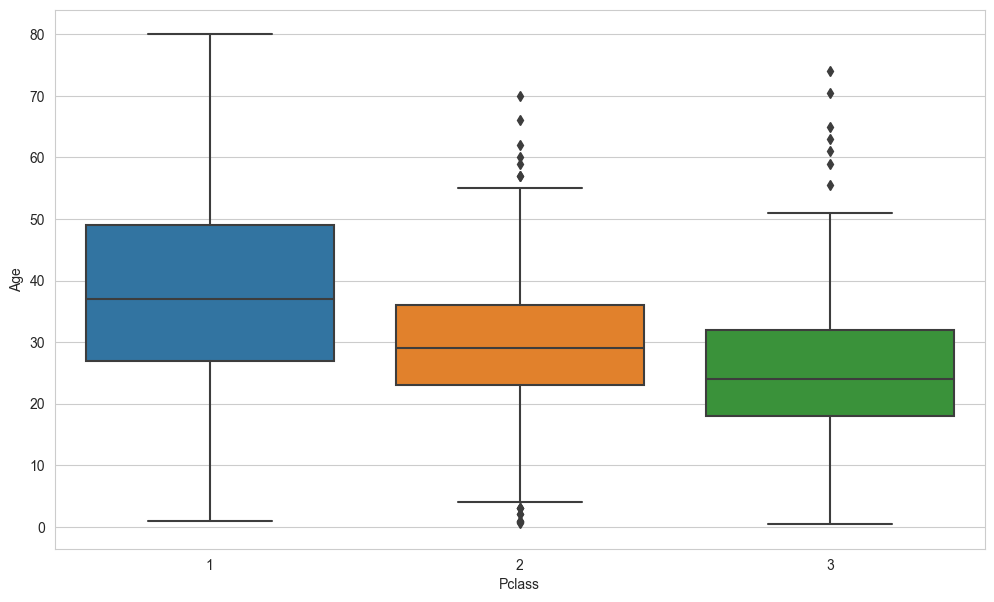

In [41]:
plt.figure(figsize=(12,4))
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=train_df)

<Figure size 1200x600 with 0 Axes>

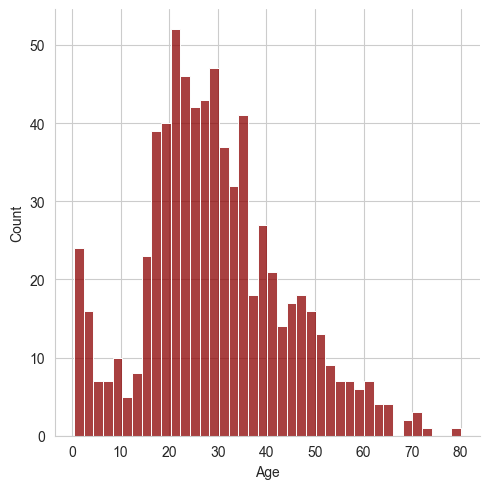

In [42]:
plt.figure(figsize=(12,6))
sns.displot(train_df['Age'].dropna(),kde=False,color='darkred',bins=40)
plt.show()

Now its time to fill up the NAN data in a "Age" column

In [43]:
def fillup_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

Apply above function to the Column "Age"

In [44]:
train_df['Age'] = train_df[['Age','Pclass']].apply(fillup_age,axis=1)

Lets confirm the data filled or not

<AxesSubplot:>

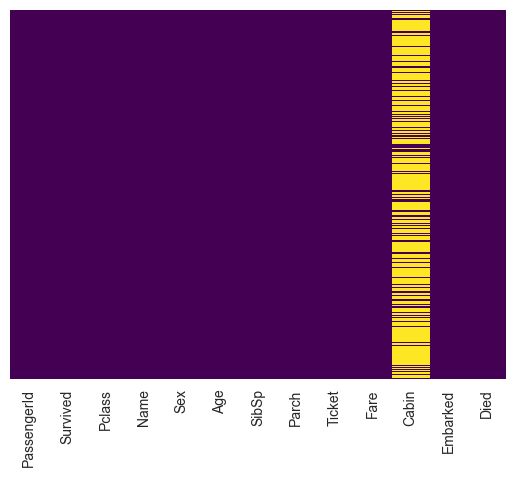

In [45]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now we are going to drop the column Cabin

In [46]:
train_df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

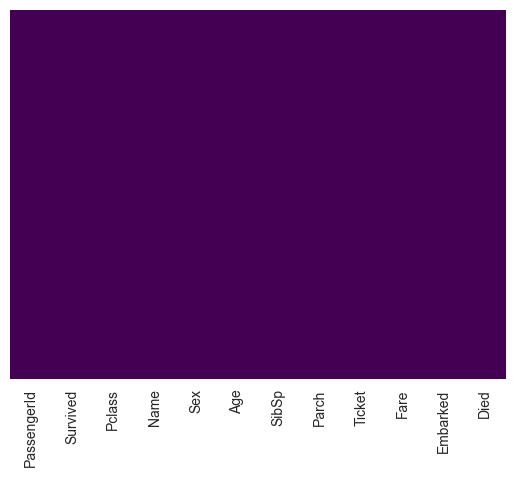

In [47]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


# Conversion of Categorical data

In [49]:
#pd.get_dummies(train_df['Embarked'],drop_first=True).head()


In [50]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
sex.value_counts()

male
1       577
0       314
dtype: int64

In [51]:
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)
embark.value_counts()

Q  S
0  1    644
   0    170
1  0     77
dtype: int64

Delete the Sex, Embarked ( converted in to numerical so delete the column) and Name, Ticket column is not required to preparation of model

In [52]:
train_df.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [53]:
dftrain = train_df.copy()

In [54]:
dftrain.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Died
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


Now we have remain only numerical data so lets add sex and embark data in to main data fram

In [55]:
dftrain = pd.concat([dftrain,sex,embark],axis=1)

In [62]:
dftrain.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Died,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,1,0,1


In [64]:
X = dftrain.drop('Survived',axis=1)

In [58]:
y = dftrain['Survived']

In [65]:
X.shape

(891, 10)

In [60]:
y.shape

(891,)

# Lets start to Building a Logistic Regression model

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train,y_train)

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [72]:
predictions = lr.predict(X_test)

Its time to Evaluation 

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       114

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



Lets do some intresting EDA

In [75]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index= False).mean().sort_values(by = 'Survived', ascending =False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [78]:
dftrain.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Died,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,1,0,1


In [84]:
dftrain[['male','Survived']].groupby(['male'], as_index=False).mean().sort_values(by = 'Survived', ascending =False)

,male,Survived
0,0,0.742038
1,1,0.188908


In [80]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by = 'Survived', ascending =False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [81]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by = 'Survived', ascending =False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


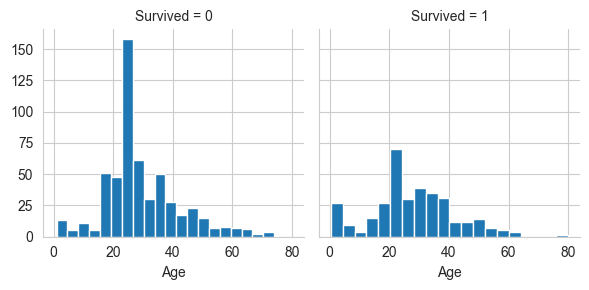

In [85]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist, 'Age', bins= 20)